# Perceptron

A perceptron is a binary classification model. It is used to distinguish two classes of linearly seperable points. The algorithm works by finding a hyperplane that can be placed between the two classes. It takes in input features and multiplies them by weights. The weighted inputs are then summed with an added bias. The output is the result of running an activation function on the weighted sum. 

The algorithm requires a set of training data, a learning rate hyperparameter, and an activation function.

## The algorithm

## Initialization

The weights of each feature and the bias must be initialized. Some models initialize at zero for all and some use random values. Generally the bias is represented by adding a feature to all points that is always one. This means that the weight for that feature is the bias.

## Training

The weights and bias are trained on each training sample. There are three cases when training on a sample.

- If the output was correct:
  - No training needs to be done
- If the output was a false positive:
  - Decrease the weights proportionally to the features
- If the output was a false negative:
  - Increase the weights proportionally to the features

This can be done by simply adding the product of the input features and the (label - the output) to the current weights.


In [1]:
import numpy as np
from typing import Callable

class Preceptron:
    """A Preceptron is a single layer neural network that can be used for binary classification."""
    def __init__(self, input_size: int, activation: Callable[[np.ndarray], np.ndarray]) -> None:
        """Initialize the Preceptron."""
        # Initialize the weights to zeros with an extra weight for the bias.
        self.W = np.zeros(input_size+1)
        self.activation = activation

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the output for the given input.
        
        Args:
            X: The input data.
            
        Returns:
            The predicted output."""
        # Check if the input is a single sample or a batch of samples.
        if X.ndim == 1:
            X = X.reshape(1, -1)
        # Add a column of ones to the data for the bias.
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.activation(X @ self.W)

    def fit(self, X: np.ndarray, y: np.ndarray, max_epochs: int = 100, lr: float = 0.5) -> None:
        """Fit the model to the given data.
        
        Args:
            X: The input data.
            y: The target output.
            max_epochs: The number of epochs to train for.
            lr: The learning rate.
        """
        # Add a column of ones to the data for the bias.
        X = np.c_[np.ones((X.shape[0], 1)), X]

        epochs = 0
        old_weights = None
        while not np.all(self.W == old_weights) and epochs < max_epochs:
            old_weights = self.W.copy()
            epochs += 1
            for x_i, y_i in zip(X, y):
                y_pred = self.activation(x_i @ self.W)
                self.W += lr * (y_i - y_pred) * x_i

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate the accuracy of the model on the given data.
        
        Args:
            X: The input data.
            y: The target output.
            
        Returns:
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

## Activation functions

Below are a few common activation functions. They all have various strengths and weaknesses. The step function is commonly used for single-layer preceptrons while sigmoid is often used for multilayer-preceptrons that use gradient descent.

In [2]:
def step(x: np.ndarray) -> np.ndarray:
    """The step activation function."""
    return (x >= 0).astype(int)

def sigmoid(x: np.ndarray) -> np.ndarray:
    """The sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def tanh(x: np.ndarray) -> np.ndarray:
    """The tanh activation function."""
    return np.tanh(x)

def relu(x: np.ndarray) -> np.ndarray:
    """The relu activation function."""
    return np.maximum(0, x)

def leaky_relu(x: np.ndarray) -> np.ndarray:
    """The leaky relu activation function."""
    return np.maximum(0.01 * x, x)

def elu(x: np.ndarray) -> np.ndarray:
    """The elu activation function."""
    return np.where(x < 0, np.exp(x) - 1, x)

def logistic(x: np.ndarray) -> np.ndarray:
    """The logistic activation function."""
    return 1 / (1 + np.exp(-x))

## Data

The functions below generate two types of data. One is linearly seperable which is prefect for preceptrons. The other is non-linearly seperable which cannot be classified with a preceptron.

In [3]:
def generate_data_ls() -> np.ndarray:
    """Generate data for a linearly separable problem.
    
    The positive class is labeled 1 and the negative class is labeled 0."""
    X = np.random.uniform(-1, 1, size=(100, 2))
    y = np.zeros(100)
    y[X[:, 0] + X[:, 1] > 0] = 1
    return X, y

def generate_data_nls() -> np.ndarray:
    """Generate data for a non-linearly separable problem.
    
    The data is two concentric circles."""
    X = np.random.uniform(-1, 1, size=(100, 2))
    y = np.sign(np.sqrt(X[:, 0]**2 + X[:, 1]**2) - 0.5)
    return X, y

## Demonstration

In [4]:
from matplotlib import pyplot as plt

def plot_decision_boundary(model: Preceptron, X: np.ndarray, y: np.ndarray) -> None:
    """Plot the decision boundary of the model.
    
    Args:
        model: The model to plot the decision boundary for.
        X: The input data.
        y: The target output.
    """
    # Create a meshgrid of the input space.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    # Predict the output for the meshgrid.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary.
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    

### Linearly seperable data

Preceptrons can classify any data where you could draw a line between the two classes.

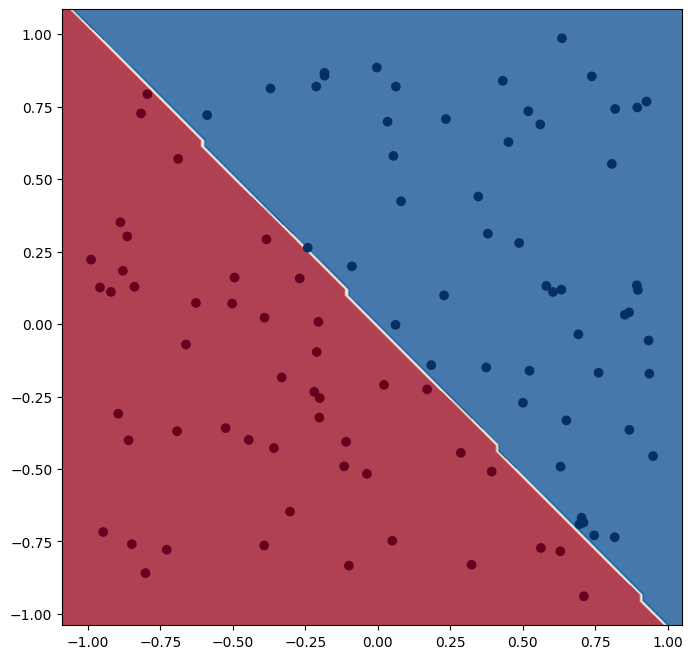

Accuracy: 1.00


In [5]:
# Generate data for a linearly separable problem.
X, y = generate_data_ls()

# Create a preceptron with the step activation function.
preceptron = Preceptron(2, step)

# Fit the model to the data.
preceptron.fit(X, y, max_epochs=1000, lr=0.5)

# Plot the data and the decision boundary.
plot_decision_boundary(preceptron, X, y)

# Score the model on the data.
print(f"Accuracy: {preceptron.score(X, y):.2f}")

### Non-linearly seperable data

A preceptron cannot classify non-convex data. To check if data is convex draw lines between all points and the other points in their class. If any of the lines of cross a line for the other class the data is non-convex.

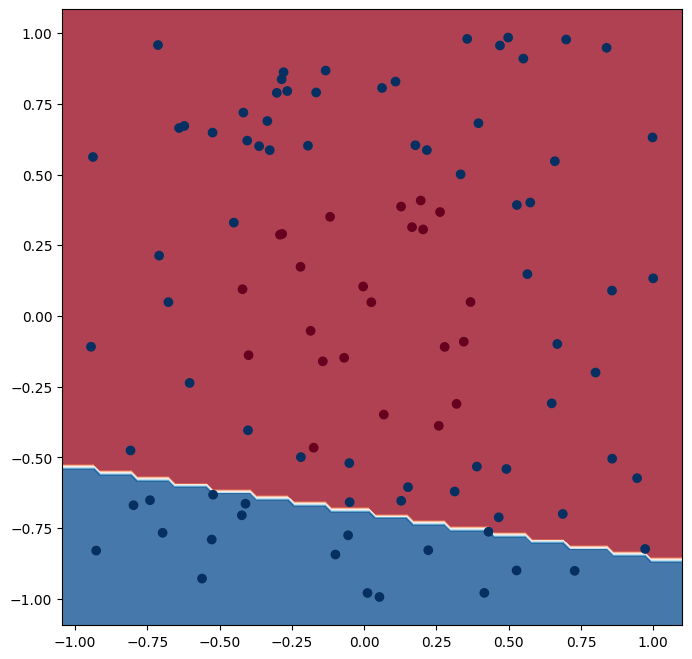

Accuracy: 0.18


In [12]:
# Generate data for a non-linearly separable problem.
X, y = generate_data_nls()

# Create a preceptron with the step activation function.
preceptron = Preceptron(2, step)

# Fit the model to the data.
preceptron.fit(X, y, max_epochs=1000, lr=0.5)

# Plot the data and the decision boundary.
plot_decision_boundary(preceptron, X, y)

# Score the model on the data.
print(f"Accuracy: {preceptron.score(X, y):.2f}")

# Multiclass Preceptron

A multiclass preceptron can preform multiclass classification by splitting the work into multiple binary classifications. One method is to use the one vs rest method which creates a preceptron for each class that predicts if a sample is in that class or any of the others. If all the preceptrons are trained correctly, you can classify new data by finding the preceptron that classifies the point positively. For this method a continious activation function will provide better results since some edge cases may evaluate positivly for several of the classifers.

In [7]:
class MulticlassPreceptron:
    """A multiclass preceptron classifier using the one-vs-rest method."""
    def __init__(self, n_features: int, n_classes: int, activation: Callable[[np.ndarray], np.ndarray]) -> None:
        """Create a multiclass preceptron.
        
        Args:
            n_features: The number of features in the data.
            n_classes: The number of classes in the data.
            activation: The activation function to use.
        """
        self.n_features = n_features
        self.n_classes = n_classes
        self.activation = activation
        # Create a preceptron for each class vs rest.
        self.models = [Preceptron(n_features, activation) for _ in range(n_classes)]

    @staticmethod
    def _one_vs_rest(X: np.ndarray, y: np.ndarray, class_: int) -> tuple[np.ndarray, np.ndarray]:
        """Convert the data to a one-vs-rest problem.
        
        Args:
            X: The input data.
            y: The target output.
            class_: The class to convert to.
            
        Returns:
            The converted input data and target output.
        """
        X = X.copy()
        y = y.copy()
        y[y != class_] = 0
        y[y == class_] = 1
        return X, y
    
    def fit(self, X: np.ndarray, y: np.ndarray, max_epochs: int = 1000, lr: float = 0.1) -> None:
        """Fit the model to the data.
        
        Args:
            X: The input data.
            y: The target output.
            max_epochs: The maximum number of epochs to train for.
            lr: The learning rate.
        """
        for class_ in range(self.n_classes):
            X_, y_ = self._one_vs_rest(X, y, class_)
            self.models[class_].fit(X_, y_, max_epochs, lr)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the output for the input data.
        
        Args:
            X: The input data.
            
        Returns:
            The predicted output.
        """
        # Predict the output for each model.
        y = np.array([model.predict(X) for model in self.models])
        # Return the class with the highest output.
        return np.argmax(y, axis=0)
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Score the model on the data.
        
        Args:
            X: The input data.
            y: The target output.
            
        Returns:
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

## Data

Multiclass preceptrons take data with any number of features exactly like a normal preceptron but can take any number of label classes as well.

In [8]:
def generate_multiclass_data_ls() -> tuple[np.ndarray, np.ndarray]:
    """Generate data for a linearly separable multiclass problem."""
    # Generate data in each quadrant.
    X1 = np.random.normal(0, 0.2, (100, 2)) + np.array([-1, -1])
    X2 = np.random.normal(0, 0.2, (100, 2)) + np.array([-1, 1])
    X3 = np.random.normal(0, 0.2, (100, 2)) + np.array([1, -1])
    X4 = np.random.normal(0, 0.2, (100, 2)) + np.array([1, 1])
    X = np.concatenate([X1, X2, X3, X4])
    y = np.concatenate([np.zeros(100), np.ones(100), np.ones(100) * 2, np.ones(100) * 3])

    return X, y.astype(int)

def generate_multiclass_data_nls() -> tuple[np.ndarray, np.ndarray]:
    """Generate data for a non-linearly separable multiclass problem.
    
    The data is several concentric circles.
    """
    X = np.random.normal(0, 0.5, (100, 2))
    y = np.zeros(100)
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    y[r < 0.25] = 0
    y[(r >= 0.25) & (r < 0.5)] = 1
    y[(r >= 0.5) & (r < 0.75)] = 2
    y[r >= 0.75] = 3

    return X, y.astype(int)

    

## Demonstration

In [9]:
def plot_multiclass_decision_boundary(model: MulticlassPreceptron, X: np.ndarray, y: np.ndarray) -> None:
    """Plot the data and the decision boundary for a multiclass problem.
    
    Args:
        model: The model to plot.
        X: The input data.
        y: The target output.
    """
    # Create a mesh to plot in.
    xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    # Predict the output for the mesh.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the mesh and the data.
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

### Linearly seperable data

The linearly seperable data can be classified with a multiclass preceptron.

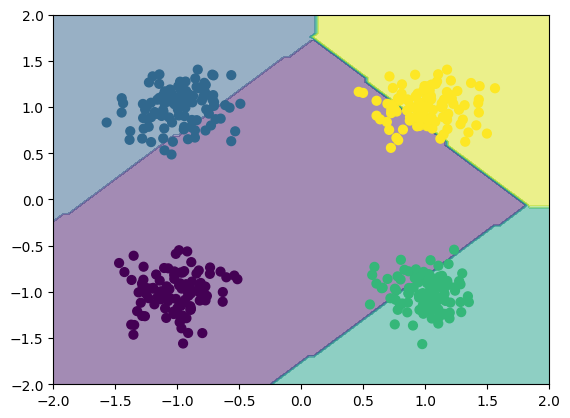

Accuracy: 0.85


In [10]:
# Generate data for a linearly separable multiclass problem.
X, y = generate_multiclass_data_ls()

# Create a multiclass preceptron with the step activation function.
preceptron = MulticlassPreceptron(2, 4, logistic)

# Fit the model to the data.
preceptron.fit(X, y, max_epochs=1000, lr=0.5)

# Plot the data and the decision boundary.
plot_multiclass_decision_boundary(preceptron, X, y)

# Score the model on the data.
print(f"Accuracy: {preceptron.score(X, y):.2f}")

### Non-linearly seperable data

The multiclass case makes non-linearly seperable data even harder and the model is mostly useless.

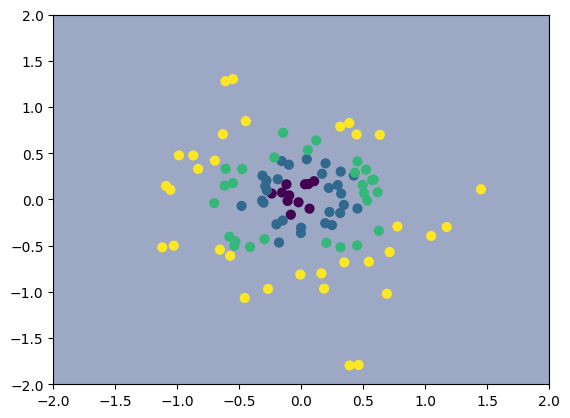

Accuracy: 0.11


In [11]:
# Generate data for a non-linearly separable multiclass problem.
X, y = generate_multiclass_data_nls()

# Create a multiclass preceptron with the logistic activation function.
preceptron = MulticlassPreceptron(2, 4, logistic)

# Fit the model to the data.
preceptron.fit(X, y, max_epochs=1000, lr=0.5)

# Plot the data and the decision boundary.
plot_multiclass_decision_boundary(preceptron, X, y)

# Score the model on the data.
print(f"Accuracy: {preceptron.score(X, y):.2f}")